Importing Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Combining dataset

In [ ]:
import os
import pandas as pd

root_directory = '/content/drive/MyDrive/merge'

merged_data = pd.DataFrame()

for root, dirs, files in os.walk(root_directory):
    for file in files:
        if file.endswith('.csv'):
            file_path = os.path.join(root, file)
            df = pd.read_csv(file_path)
            merged_data = merged_data.append(df, ignore_index=True)

merged_data.to_csv('/content/drive/MyDrive/combined.csv', index=False)

Adding a cloumn label

In [ ]:
import pandas as pd

csv_file_path = '/content/drive/MyDrive/merge/Othermerge.csv'
df = pd.read_csv(csv_file_path)

df['label'] = 'other'

df.to_csv(csv_file_path, index=False)


Count of data

In [ ]:
import pandas as pd

csv_file_path = '/content/drive/MyDrive/balanced.csv'
df = pd.read_csv(csv_file_path)

label_counts = df['label'].value_counts()

print(label_counts)

5G               157146
other            157146
NonConspiracy    157146
Name: label, dtype: int64


Checking balance of dataset

In [ ]:
import pandas as pd

csv_file_path = '/content/drive/MyDrive/balanced.csv'
df = pd.read_csv(csv_file_path)

class_distribution = df['label'].value_counts()

print("Class Distribution:")
print(class_distribution)

majority_percentage = class_distribution.max() / class_distribution.sum() * 100
print(f"Percentage of Majority Class: {majority_percentage:.2f}%")

is_balanced = all(count == class_distribution.iloc[0] for count in class_distribution)
if is_balanced:
    print("The dataset is balanced.")
else:
    print("The dataset is not balanced.")


Class Distribution:
5G               157146
other            157146
NonConspiracy    157146
Name: label, dtype: int64
Percentage of Majority Class: 33.33%
The dataset is balanced.


Graph

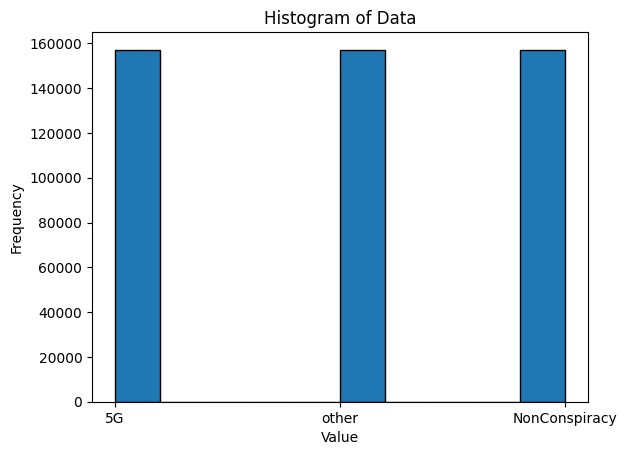

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('/content/drive/MyDrive/balanced.csv')
plt.hist(data['label'], bins=10, edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Data')
plt.show()

Balancing code

In [ ]:
import pandas as pd
from imblearn.over_sampling import RandomOverSampler

csv_file_path = '/content/drive/MyDrive/combined.csv'
df = pd.read_csv(csv_file_path)

X = df.drop('label', axis=1)
y = df['label']

oversampler = RandomOverSampler()
X_resampled, y_resampled = oversampler.fit_resample(X, y)

balanced_df = pd.DataFrame(X_resampled, columns=X.columns)
balanced_df['label'] = y_resampled

balanced_csv_path = '/content/drive/MyDrive/balanced.csv'
balanced_df.to_csv(balanced_csv_path, index=False)


Classification Code (Logistic Regression)




In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

csv_file_path = '/content/drive/MyDrive/combined.csv'
df = pd.read_csv(csv_file_path)

data=pd.DataFrame(df)

X = data.drop('label', axis=1)
y = data['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression()

model.fit(X_train_scaled, y_train)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

report = classification_report(y_test, y_pred)
print(report)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


               precision    recall  f1-score   support

           5G       0.00      0.00      0.00      3742
NonConspiracy       0.73      1.00      0.85     31573
        other       0.00      0.00      0.00      7668

     accuracy                           0.73     42983
    macro avg       0.24      0.33      0.28     42983
 weighted avg       0.54      0.73      0.62     42983



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification (Support Vector Machines)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report

csv_file_path = '/content/drive/MyDrive/combined.csv'
data = pd.read_csv(csv_file_path)

X = data['id']
y = data['label']

vectorizer = CountVectorizer()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = SVC(kernel='linear')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

report = classification_report(y_test, y_pred)
print(report)


Classification (Kth Nearest Neighbours)


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

csv_file_path = '/content/drive/MyDrive/combined.csv'
data = pd.read_csv(csv_file_path)

X = data['label']
y = data['label']

vectorizer = CountVectorizer()
X_vectorized = vectorizer.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)

model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

report = classification_report(y_test, y_pred)
print(report)


               precision    recall  f1-score   support

           5G       1.00      1.00      1.00      3742
NonConspiracy       1.00      1.00      1.00     31573
        other       1.00      1.00      1.00      7668

     accuracy                           1.00     42983
    macro avg       1.00      1.00      1.00     42983
 weighted avg       1.00      1.00      1.00     42983



Classification (Kth Nearest Neighbours) hyper parameter tuning


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
import numpy as np

csv_file_path = '/content/drive/MyDrive/combined.csv'
data = pd.read_csv(csv_file_path)

X = data['label']
y = data['label']

vectorizer = CountVectorizer()
X_vectorized = vectorizer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)

knn_classifier = KNeighborsClassifier()

param_dist = {
    'n_neighbors': np.arange(3, 20),
    'weights': ['uniform', 'distance']
}

random_search = RandomizedSearchCV(knn_classifier, param_distributions=param_dist, n_iter=10, cv=5, random_state=42)
random_search.fit(X_train, y_train)

best_model = random_search.best_estimator_

y_pred = best_model.predict(X_test)

report = classification_report(y_test, y_pred)
print(report)


               precision    recall  f1-score   support

           5G       1.00      1.00      1.00      3742
NonConspiracy       1.00      1.00      1.00     31573
        other       1.00      1.00      1.00      7668

     accuracy                           1.00     42983
    macro avg       1.00      1.00      1.00     42983
 weighted avg       1.00      1.00      1.00     42983



Classification Code (Logistic Regression)
Hyper parameter tuning

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

csv_file_path = '/content/drive/MyDrive/combined.csv'
df = pd.read_csv(csv_file_path)

data = pd.DataFrame(df)

X = data.drop('label', axis=1)
y = data['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression()

param_dist = {
    'C': np.logspace(-3, 3, 10),
    'penalty': ['l1', 'l2']
}

random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=10, cv=5, random_state=42)
random_search.fit(X_train_scaled, y_train)

best_model = random_search.best_estimator_

y_pred = best_model.predict(X_test_scaled)

report = classification_report(y_test, y_pred)
print(report)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solve

               precision    recall  f1-score   support

           5G       0.00      0.00      0.00      3742
NonConspiracy       0.73      1.00      0.85     31573
        other       0.00      0.00      0.00      7668

     accuracy                           0.73     42983
    macro avg       0.24      0.33      0.28     42983
 weighted avg       0.54      0.73      0.62     42983



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Logistic regression + ensemble method (bagging/bootstrap aggregating)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

csv_file_path = '/content/drive/MyDrive/combined.csv'
df = pd.read_csv(csv_file_path)

data = pd.DataFrame(df)

X = data.drop('label', axis=1)
y = data['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

base_model = LogisticRegression()

model = BaggingClassifier(base_model, n_estimators=100, random_state=42)

model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

report = classification_report(y_test, y_pred)
print(report)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


               precision    recall  f1-score   support

           5G       0.00      0.00      0.00      3742
NonConspiracy       0.73      1.00      0.85     31573
        other       0.00      0.00      0.00      7668

     accuracy                           0.73     42983
    macro avg       0.24      0.33      0.28     42983
 weighted avg       0.54      0.73      0.62     42983



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Logistic Regression + ensemble (boosting (using adaboost))

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

csv_file_path = '/content/drive/MyDrive/combined.csv'
df = pd.read_csv(csv_file_path)

data = pd.DataFrame(df)

X = data.drop('label', axis=1)
y = data['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

base_model = DecisionTreeClassifier(max_depth=1)

model = AdaBoostClassifier(base_model, n_estimators=100, random_state=42)

model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)


report = classification_report(y_test, y_pred)
print(report)


               precision    recall  f1-score   support

           5G       0.77      0.01      0.02      3742
NonConspiracy       0.74      1.00      0.85     31573
        other       0.72      0.01      0.02      7668

     accuracy                           0.74     42983
    macro avg       0.74      0.34      0.30     42983
 weighted avg       0.74      0.74      0.63     42983



Logistic Regression + ensemble (Random Forest)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

csv_file_path = '/content/drive/MyDrive/combined.csv'
df = pd.read_csv(csv_file_path)

data = pd.DataFrame(df)

X = data.drop('label', axis=1)
y = data['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = RandomForestClassifier(n_estimators=100, random_state=42)

model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

report = classification_report(y_test, y_pred)
print(report)


               precision    recall  f1-score   support

           5G       0.25      0.08      0.12      3742
NonConspiracy       0.76      0.93      0.84     31573
        other       0.33      0.14      0.19      7668

     accuracy                           0.71     42983
    macro avg       0.45      0.38      0.38     42983
 weighted avg       0.64      0.71      0.66     42983



Logistic Rgression + Hyper parameter tuning (Bayesian Optimization)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from skopt import BayesSearchCV

csv_file_path = '/content/drive/MyDrive/combined.csv'
df = pd.read_csv(csv_file_path)

data = pd.DataFrame(df)

X = data.drop('label', axis=1)
y = data['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

param_space = {
    'n_estimators': (50, 200),
    'max_depth': (5, 50),
    'min_samples_split': (2, 20),
    'min_samples_leaf': (1, 20),
    'max_features': (0.1, 1.0)
}

model = RandomForestClassifier()

opt = BayesSearchCV(
    model,
    param_space,
    n_iter=50,
    cv=5,
    n_jobs=-1,
    random_state=42
)

opt.fit(X_train_scaled, y_train)

best_model = opt.best_estimator_

y_pred = best_model.predict(X_test_scaled)

report = classification_report(y_test, y_pred)
print(report)


Logistic Regression + ensemble(Random Forest) + hyperparameter tuning (Bayeis Optimization)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from skopt import BayesSearchCV

csv_file_path = '/content/drive/MyDrive/combined.csv'
df = pd.read_csv(csv_file_path)

data = pd.DataFrame(df)

X = data.drop('label', axis=1)
y = data['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

param_space = {
    'n_estimators': (50, 200),
    'max_depth': (5, 50),
    'min_samples_split': (2, 20),
    'min_samples_leaf': (1, 20),
    'max_features': (0.1, 1.0)
}

base_model = RandomForestClassifier()

opt = BayesSearchCV(
    base_model,
    param_space,
    n_iter=50,
    cv=5,
    n_jobs=-1,
    random_state=42
)

opt.fit(X_train_scaled, y_train)

best_model = opt.best_estimator_

y_pred = best_model.predict(X_test_scaled)

report = classification_report(y_test, y_pred)
print(report)


               precision    recall  f1-score   support

           5G       0.52      0.02      0.04      3742
NonConspiracy       0.74      0.99      0.85     31573
        other       0.48      0.06      0.10      7668

     accuracy                           0.74     42983
    macro avg       0.58      0.36      0.33     42983
 weighted avg       0.68      0.74      0.65     42983



Logistic Regression + ensemble( Gradient Boosting) + hyperparameter tuning (Randomized CV)

In [ ]:

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

csv_file_path = '/content/drive/MyDrive/combined.csv'
df = pd.read_csv(csv_file_path)

data = pd.DataFrame(df)

X = data.drop('label', axis=1)
y = data['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

param_dist = {
    'n_estimators': np.arange(50, 201),
    'learning_rate': [0.001, 0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6],
    'min_samples_split': np.arange(2, 21),
    'min_samples_leaf': np.arange(1, 21),
    'max_features': [0.1, 0.3, 0.5, 0.7, 0.9, 1.0]
}

model = GradientBoostingClassifier()

random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=50, cv=5, random_state=42)
random_search.fit(X_train_scaled, y_train)

best_model = random_search.best_estimator_

y_pred = best_model.predict(X_test_scaled)

report = classification_report(y_test, y_pred)
print(report)


               precision    recall  f1-score   support

           5G       0.44      0.03      0.06      3742
NonConspiracy       0.75      0.99      0.85     31573
        other       0.60      0.05      0.10      7668

     accuracy                           0.74     42983
    macro avg       0.59      0.36      0.34     42983
 weighted avg       0.69      0.74      0.65     42983

